In [ ]:
pip install anvil-uplink

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45216 sha256=f850d2c85e99945521e207e4389f2c106049b349c95c74d6b969216b64c035e6
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [ ]:
import anvil.server
import anvil.media
anvil.server.connect("KAMONKLKGWTHNLTE7GDTLJTG-PZK7WVA2S42P7CSI")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir train

In [ ]:
!mkdir test

In [ ]:
!unzip /content/drive/MyDrive/alphaaaaaa/Training.zip -d /content/train/

Archive:  /content/drive/MyDrive/alphaaaaaa/Training.zip
  inflating: /content/train/Training/z/20.png  
  inflating: /content/train/Training/z/16.png  
  inflating: /content/train/Training/z/9.png  
  inflating: /content/train/Training/z/19.png  
  inflating: /content/train/Training/z/2.png  
  inflating: /content/train/Training/z/6.png  
  inflating: /content/train/Training/n/8.png  
  inflating: /content/train/Training/n/9.png  
  inflating: /content/train/Training/z/13.png  
  inflating: /content/train/Training/z/3.png  
  inflating: /content/train/Training/z/14.png  
  inflating: /content/train/Training/z/5.png  
  inflating: /content/train/Training/z/4.png  
  inflating: /content/train/Training/p/9.png  
  inflating: /content/train/Training/z/7.png  
  inflating: /content/train/Training/z/12.png  
  inflating: /content/train/Training/z/18.png  
  inflating: /content/train/Training/z/10.png  
  inflating: /content/train/Training/x/15.png  
  inflating: /content/train/Training/n/7.

In [ ]:
!unzip /content/drive/MyDrive/alphaaaaaa/Testing.zip -d /content/test/

Archive:  /content/drive/MyDrive/alphaaaaaa/Testing.zip
replace /content/test/Testing/r/23.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = '/content/train/Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/test/Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_7 (Dense)              (None, 26)               

In [ ]:
history = model.fit(train_generator,
                         steps_per_epoch = 12,
                         epochs = 5,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/5
12/12 [==============================] - 1s 73ms/step - loss: 0.4659 - accuracy: 0.8338 - val_loss: 0.8101 - val_accuracy: 0.7231
Epoch 2/5
12/12 [==============================] - 1s 57ms/step - loss: 0.4623 - accuracy: 0.8359
Epoch 3/5
12/12 [==============================] - 1s 58ms/step - loss: 0.4039 - accuracy: 0.8646
Epoch 4/5
12/12 [==============================] - 1s 58ms/step - loss: 0.3593 - accuracy: 0.8802
Epoch 5/5
12/12 [==============================] - 1s 59ms/step - loss: 0.3319 - accuracy: 0.8646


In [ ]:
model.save('model_keras.h5')

In [ ]:
model = load_model('model_keras.h5')

In [ ]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

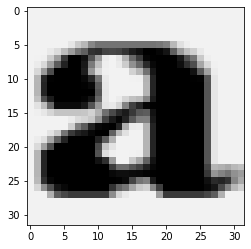

In [ ]:
filename = r'/content/testinga.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:

@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        test_image = image.load_img(filename, target_size = (32,32))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        result = get_result(result)
        return ('Predicted Alphabet is: {}'.format(result))

In [ ]:
test_image = image.load_img(filename, target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = get_result(result)
print('Predicted Alphabet is: {}'.format(result))

Predicted Alphabet is: a
